In [62]:
import numpy as np
import matplotlib.pyplot as plt
import aplpy
import matplotlib.gridspec as gridspec
from astropy.wcs import WCS
from astropy.io import fits

In [63]:
tran_ra = 246.99796
tran_dec = -52.58453

In [163]:
i_map = fits.open('transient/paper_revise/1200354592-MFS-pbcorr-image-I.fits')
q_map = fits.open('transient/paper_revise/1200354592-MFS-pbcorr-image-Q.fits')
u_map = fits.open('transient/paper_revise/1200354592-MFS-pbcorr-image-U.fits')
v_map = fits.open('transient/paper_revise/1200354592-MFS-pbcorr-image-V.fits')
p_map = fits.open('transient/paper_revise/FDF_maxPI.fits')
rm_map = fits.open('transient/paper_revise/FDF_peakRM.fits')

In [164]:
wcs = WCS(i_map[0].header).dropaxis(3).dropaxis(2)

In [169]:
# select polarised source region from the RM map
p_data = p_map[0].data[0]*1
rm_data = rm_map[0].data[0]*1

p_mean = np.mean(p_data)
p_std = np.std(p_data)
rm_data[p_data<p_mean+7*p_std] = 0

/var/folders/1h/3d92xpr54q916sp3tdcpmdbc0000gn/T/ipykernel_71502/4211069178.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  char = plt.colorbar(im,fraction=0.046, pad=0.04)
/var/folders/1h/3d92xpr54q916sp3tdcpmdbc0000gn/T/ipykernel_71502/4211069178.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  char = plt.colorbar(im,fraction=0.046, pad=0.04)
/var/folders/1h/3d92xpr54q916sp3tdcpmdbc0000gn/T/ipykernel_71502/4211069178.py:48: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to pla

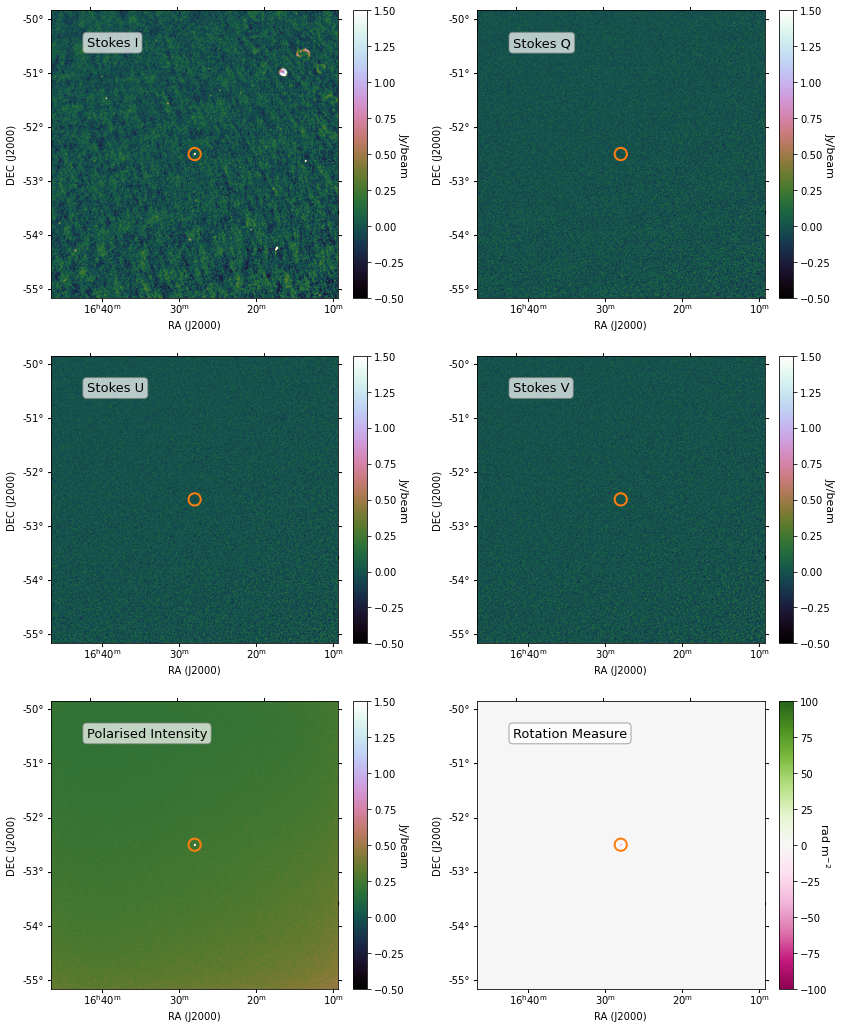

In [201]:
fig = plt.figure(figsize=[14,18])

ax = plt.subplot(321,projection=wcs)
im = ax.imshow(i_map[0].data[0,0], vmin=-0.5, vmax=1.5, origin='lower',cmap='cubehelix')
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('Jy/beam', rotation=270, fontsize=11)
ax.text(200,1400,'Stokes I', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

ax = plt.subplot(322,projection=wcs)
ax.imshow(q_map[0].data[0,0], vmin=-0.5, vmax=1.5, origin='lower',cmap='cubehelix')
ax.text(200,1400,'Stokes Q', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('Jy/beam', rotation=270, fontsize=11)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

ax = plt.subplot(323,projection=wcs)
ax.imshow(u_map[0].data[0,0], vmin=-0.5, vmax=1.5, origin='lower',cmap='cubehelix')
ax.text(200,1400,'Stokes U', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('Jy/beam', rotation=270, fontsize=11)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

ax = plt.subplot(324,projection=wcs)
ax.imshow(v_map[0].data[0,0], vmin=-0.5, vmax=1.5, origin='lower',cmap='cubehelix')
ax.text(200,1400,'Stokes V', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('Jy/beam', rotation=270, fontsize=11)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

ax = plt.subplot(325,projection=wcs)
im = ax.imshow(p_map[0].data[0], vmin=-0.5, vmax=1.5, origin='lower',cmap='cubehelix')
ax.text(200,1400,'Polarised Intensity', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('Jy/beam', rotation=270, fontsize=11)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

ax = plt.subplot(326,projection=wcs)
im = ax.imshow(rm_data, vmin=-100, vmax=100, origin='lower',cmap='PiYG')
ax.text(200,1400,'Rotation Measure', color='k', size=13,
       bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="0.5", alpha=0.7))
ax.scatter(tran_ra,tran_dec,marker='o',s=150, edgecolor='tab:orange',facecolor='None', 
           linewidth=2,transform=ax.get_transform('world'))
char = plt.colorbar(im,fraction=0.046, pad=0.04)
char.set_label('rad m$^{-2}$', rotation=270, fontsize=11)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('RA (J2000)')
lat.set_axislabel('DEC (J2000)')

plt.savefig('tran_revise_iquvprm.png', facecolor='w', dpi=300, bbox_inches='tight')